# How to train a new language model from scratch using Transformers and Tokenizers

Copyright 2021-2023, Denis Rothman. Denis Rothman adapted a Hugging Face reference notebook to pretrain a transformer model. The next steps would be to work on building a larger dataset and testing several transformer models.

It is recommended to understand this notebook. The emergence of GPT-3 engines has produced an API that can outperform many trained transformers models. However, to show a transformer what to do with the input datasets, it is essential to understand how they are trained.

The Transformer model of this Notebook is a Transformer model named ***KantaiBERT***. ***KantaiBERT*** is trained as a RoBERTa Transformer with DistilBERT architecture. The dataset was compiled with three books by Immanuel Kant downloaded from the [Gutenberg Project](https://www.gutenberg.org/). In 2023, multimodal(any type of source) transformers are trending. Note that in this notebook, the source is a seqences of EVENTS which can be applied to Supply Chain Management, consumer behaviour, social media patterns, etc.


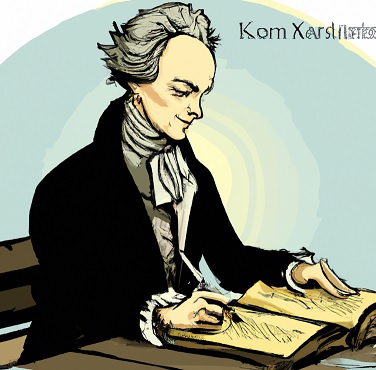

In [1]:
from IPython.display import Image     #This is used for rendering images in the notebook
#This image was generated by OpenAI DALLE-E using Transformers-for-NLP-2nd-Edition/Bonus/Generating_images_with_the_OpenAI_DALL_E_API.ipynb
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/16/KANT.JPG', width=700)

***KantaiBERT*** was pretrained with a small model of 84 million parameters using the same number of layers and heads as DistilBert, i.e., 6 layers, 768 hidden size,and 12 attention heads. ***KantaiBERT*** is then fine-tuned for a downstream masked Language Modeling task.

### The Hugging Face original Reference and notes:

Notebook edition (link to original of the reference blogpost [link](https://huggingface.co/blog/how-to-train)).

#Training customer behaviors with an MDP

In [2]:
#@title Step 1A Training: Dataset Pipeline Simulation with RL using an MDP
# -*- coding: utf-8 -*-
# Markov Decision Process (MDP) - The Bellman equations adapted to
# Q Learning.Reinforcement Learning with the Q action-value(reward) function.
# Copyright 2021 Denis Rothman MIT License. See LICENSE.
import numpy as ql
import math
# R is The Reward Matrix for each state
#ABCDEF
#Initial Rules:  AE,BD,BF,C,CD,DB,DC,DE,EA,ED,FB
R = ql.matrix([ [0,0,0,0,1,0],   #A
		            [0,0,0,1,0,1],   #B
		            [0,0,100,1,0,0], #C
	              [0,1,1,0,1,0],   #D
		            [1,0,0,1,0,0],   #E
		            [0,1,0,0,0,0]])  #F
                #A,B,C,D,E,F
# Q is the Learning Matrix in which rewards will be learned/stored
Q = ql.matrix(ql.zeros([6,6]))

"""##  The Learning rate or training penalty"""

# Gamma : It's a form of penalty or uncertainty for learning
# If the value is 1 , the rewards would be too high.
# This way the system knows it is learning.
gamma = 0.8

"""## Initial State"""

# agent_s_state. The agent the name of the system calculating
# s is the state the agent is going from and s' the state it's going to
# this state can be random or it can be chosen as long as the rest of the choices
# are not determined. Randomness is part of this stochastic process
agent_s_state = 5

"""## The random choice of the next state"""

# The possible "a" actions when the agent is in a given state
def possible_actions(state):
    current_state_row = R[state,]
    possible_act = ql.where(current_state_row >0)[1]
    return possible_act

# Get available actions in the current state
PossibleAction = possible_actions(agent_s_state)

# This function chooses at random which action to be performed within the range
# of all the available actions.
def ActionChoice(available_actions_range):
    if(sum(PossibleAction)>0):
        next_action = int(ql.random.choice(PossibleAction,1))
    if(sum(PossibleAction)<=0):
        next_action = int(ql.random.choice(5,1))
    return next_action

# Sample next action to be performed
action = ActionChoice(PossibleAction)

"""## The Bellman Equation"""

# A version of the Bellman equation for reinforcement learning using the Q function
# This reinforcement algorithm is a memoryless process
# The transition function T from one state to another
# is not in the equation below.  T is done by the random choice above

def reward(current_state, action, gamma):
    Max_State = ql.where(Q[action,] == ql.max(Q[action,]))[1]

    if Max_State.shape[0] > 1:
        Max_State = int(ql.random.choice(Max_State, size = 1))
    else:
        Max_State = int(Max_State)
    MaxValue = Q[action, Max_State]

    # The Bellman MDP based Q function
    Q[current_state, action] = R[current_state, action] + gamma * MaxValue

# Rewarding Q matrix
reward(agent_s_state,action,gamma)

"""## Running the training episodes randomly"""

# Learning over n iterations depending on the convergence of the system
# A convergence function can replace the systematic repeating of the process
# by comparing the sum of the Q matrix to that of Q matrix n-1 in the
# previous episode
for i in range(50000):
    current_state = ql.random.randint(0, int(Q.shape[0]))
    PossibleAction = possible_actions(current_state)
    action = ActionChoice(PossibleAction)
    reward(current_state,action,gamma)

# Displaying Q before the norm of Q phase
print("Q  :")
print(Q)

# Norm of Q
print("Normed Q :")
print(Q/ql.max(Q)*100)
Qp=Q/ql.max(Q)

Q  :
[[  0.      0.      0.      0.    258.44    0.   ]
 [  0.      0.      0.    321.8     0.    207.752]
 [  0.      0.    500.    321.8     0.      0.   ]
 [  0.    258.44  401.      0.    258.44    0.   ]
 [207.752   0.      0.    321.8     0.      0.   ]
 [  0.    258.44    0.      0.      0.      0.   ]]
Normed Q :
[[  0.       0.       0.       0.      51.688    0.    ]
 [  0.       0.       0.      64.36     0.      41.5504]
 [  0.       0.     100.      64.36     0.       0.    ]
 [  0.      51.688   80.2      0.      51.688    0.    ]
 [ 41.5504   0.       0.      64.36     0.       0.    ]
 [  0.      51.688    0.       0.       0.       0.    ]]


#Simulating consumer behavior with an MDP

In [3]:
#@title Step 1B Applying: Dataset Pipeline Simulation with MDP

""" Simulating a decision-making process"""
f = open("kant.txt", "w")
conceptcode=["A","B","C","D","E","F"]

maxv=10000

sh=ql.zeros((maxv, 2))
for i in range(0,maxv):
    print(" ",end="")
    f.write(" ")
    nextc=-1
    nextci=-1
    origin=ql.random.randint(0,6)

    print("",end="")
    print(conceptcode[int(origin)],end="")
    f.write("")
    f.write(conceptcode[int(origin)])

    for se in range(0,6):
        if(se==0):
            po=origin
        if(se>0):
            po=nextci
        for ci in range(0,6):
            maxc=Q[po,ci]
            if(maxc>=nextc):
                nextc=maxc
                nextci=ci
        if(nextci==po):
            break;
        print(conceptcode[int(nextci)],end="")
        f.write(conceptcode[int(nextci)])
f.close()

 DC BDC BDC EDC BDC BDC DC AEDC EDC DC BDC AEDC EDC FBDC FBDC C FBDC BDC FBDC AEDC AEDC BDC AEDC FBDC FBDC FBDC DC EDC BDC EDC BDC EDC C FBDC DC C BDC C DC BDC BDC EDC DC FBDC C FBDC BDC EDC DC BDC FBDC AEDC BDC EDC EDC AEDC FBDC BDC C EDC EDC AEDC AEDC BDC FBDC DC EDC FBDC C FBDC C FBDC BDC AEDC C FBDC EDC EDC BDC DC EDC BDC BDC EDC DC BDC C BDC EDC C FBDC EDC AEDC BDC AEDC FBDC BDC EDC C FBDC BDC C EDC DC BDC FBDC DC FBDC BDC AEDC DC DC AEDC DC C FBDC AEDC C FBDC DC BDC BDC BDC DC AEDC EDC FBDC EDC FBDC C EDC BDC FBDC BDC C AEDC EDC C AEDC C FBDC BDC C EDC BDC EDC DC EDC EDC DC DC BDC FBDC EDC EDC FBDC C DC EDC EDC EDC BDC BDC BDC FBDC EDC AEDC FBDC DC DC C AEDC FBDC FBDC C BDC FBDC BDC FBDC BDC AEDC C BDC DC FBDC EDC C FBDC AEDC EDC BDC DC DC FBDC BDC AEDC C FBDC BDC C DC DC DC DC DC C FBDC FBDC AEDC C FBDC AEDC AEDC DC FBDC C AEDC AEDC DC BDC DC DC C C AEDC FBDC FBDC FBDC DC BDC DC EDC BDC C AEDC EDC C BDC AEDC EDC BDC AEDC EDC DC EDC DC C FBDC AEDC AEDC FBDC FBDC AEDC BDC EDC FBDC

In [4]:
#@title Step 2:APRIL 2023 UPDATE: Installing Hugging Face Transformers
'''
# We won't need TensorFlow here
!pip uninstall -y tensorflow
# Install `transformers` from master
!pip install git+https://github.com/huggingface/transformers
!pip list | grep -E 'transformers|tokenizers'
# transformers version at notebook update --- 2.9.1
# tokenizers version at notebook update --- 0.7.0
'''

"\n# We won't need TensorFlow here\n!pip uninstall -y tensorflow\n# Install `transformers` from master\n!pip install git+https://github.com/huggingface/transformers\n!pip list | grep -E 'transformers|tokenizers'\n# transformers version at notebook update --- 2.9.1\n# tokenizers version at notebook update --- 0.7.0\n"

April 2023 update From Hugging Face Issue 22816:

https://github.com/huggingface/transformers/issues/22816

"The PartialState import was added as a dependency on the transformers development branch yesterday. PartialState was added in the 0.17.0 release in accelerate, and so for the development branch of transformers, accelerate >= 0.17.0 is required.

Downgrading the transformers version removes the code which is importing PartialState."

Denis Rothman: The following cell imports the latest version of Hugging Face transformers but without downgrading it.

To adapt to the Hugging Face upgrade, A GPU accelerator was activated using the Google Colab Pro with the following NVIDIA GPU:
GPU Name: NVIDIA A100-SXM4-40GB

In [5]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 1.5 MB/s eta 0:00:00


In [6]:
!pip install transformers

In [7]:
#@title Step 3: Training a Tokenizer
%%time
from pathlib import Path

from tokenizers import ByteLevelBPETokenizer

paths = [str(x) for x in Path(".").glob("**/*.txt")]
# Initialize a tokenizer
tokenizer = ByteLevelBPETokenizer()

# Customize training
tokenizer.train(files=paths, vocab_size=52_000, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])

CPU times: user 36.9 ms, sys: 8.13 ms, total: 45 ms
Wall time: 141 ms


In [8]:
#@title Step 4: Saving the files to disk
import os
token_dir = '/content/KantaiBERT'
if not os.path.exists(token_dir):
  os.makedirs(token_dir)
tokenizer.save_model('KantaiBERT')

['KantaiBERT/vocab.json', 'KantaiBERT/merges.txt']

In [9]:
#@title Step 5 Loading the Trained Tokenizer Files
from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing

tokenizer = ByteLevelBPETokenizer(
    "./KantaiBERT/vocab.json",
    "./KantaiBERT/merges.txt",
)

In [10]:
tokenizer.encode("The Critique of Pure Reason.").tokens

['T',
 'h',
 'e',
 'ĠC',
 'r',
 'i',
 't',
 'i',
 'q',
 'u',
 'e',
 'Ġ',
 'o',
 'f',
 'Ġ',
 'P',
 'u',
 'r',
 'e',
 'Ġ',
 'R',
 'e',
 'a',
 's',
 'o',
 'n',
 '.']

In [11]:
tokenizer.encode("The Critique of Pure Reason.")

Encoding(num_tokens=27, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [12]:
tokenizer._tokenizer.post_processor = BertProcessing(
    ("</s>", tokenizer.token_to_id("</s>")),
    ("<s>", tokenizer.token_to_id("<s>")),
)
tokenizer.enable_truncation(max_length=512)

In [13]:
#@title Step 6: Checking Resource Constraints: GPU and NVIDIA
!nvidia-smi

Wed Dec  6 15:41:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
#@title Checking that PyTorch Sees Cuda
import torch
torch.cuda.is_available()

True

In [15]:
#@title Step 7: Defining the configuration of the Model
from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=52_000,
    max_position_embeddings=514,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)

In [16]:
print(config)

RobertaConfig {
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 52000
}



In [17]:
#@title Step 8: Re-creating the Tokenizer in Transformers
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained("./KantaiBERT", max_length=512)

In [18]:
#@title Step 9: Initializing a Model From Scratch
from transformers import RobertaForMaskedLM

model = RobertaForMaskedLM(config=config)
print(model)

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(52000, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

In [19]:
print(model.num_parameters())
# => 84,095,008 parameters

83504416


In [20]:
#@title Exploring the Parameters
LP=list(model.parameters())
lp=len(LP)
print(lp)
for p in range(0,lp):
  print(LP[p])

106
Parameter containing:
tensor([[ 0.0142, -0.0111, -0.0377,  ..., -0.0098,  0.0018, -0.0082],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0045, -0.0395, -0.0209,  ..., -0.0153,  0.0456, -0.0208],
        ...,
        [-0.0168,  0.0010, -0.0079,  ..., -0.0122, -0.0009, -0.0168],
        [-0.0174,  0.0589, -0.0097,  ..., -0.0033,  0.0324,  0.0305],
        [ 0.0106, -0.0273,  0.0192,  ..., -0.0072,  0.0115, -0.0185]],
       requires_grad=True)
Parameter containing:
tensor([[-0.0221, -0.0207, -0.0232,  ..., -0.0186,  0.0064, -0.0163],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0018, -0.0192,  0.0186,  ..., -0.0362, -0.0010,  0.0042],
        ...,
        [ 0.0294, -0.0214,  0.0140,  ...,  0.0124, -0.0575, -0.0326],
        [ 0.0410, -0.0200,  0.0351,  ...,  0.0335, -0.0100, -0.0098],
        [ 0.0069, -0.0252,  0.0291,  ...,  0.0039, -0.0211,  0.0088]],
       requires_grad=True)
Parameter containing:
tensor([

In [21]:
#@title Counting the parameters
np=0
for p in range(0,lp):#number of tensors
  PL2=True
  try:
    L2=len(LP[p][0]) #check if 2D
  except:
    L2=1             #not 2D but 1D
    PL2=False
  L1=len(LP[p])
  L3=L1*L2
  np+=L3             # number of parameters per tensor
  if PL2==True:
    print(p,L1,L2,L3)  # displaying the sizes of the parameters
  if PL2==False:
    print(p,L1,L3)  # displaying the sizes of the parameters

print(np)              # total number of parameters

0 52000 768 39936000
1 514 768 394752
2 1 768 768
3 768 768
4 768 768
5 768 768 589824
6 768 768
7 768 768 589824
8 768 768
9 768 768 589824
10 768 768
11 768 768 589824
12 768 768
13 768 768
14 768 768
15 3072 768 2359296
16 3072 3072
17 768 3072 2359296
18 768 768
19 768 768
20 768 768
21 768 768 589824
22 768 768
23 768 768 589824
24 768 768
25 768 768 589824
26 768 768
27 768 768 589824
28 768 768
29 768 768
30 768 768
31 3072 768 2359296
32 3072 3072
33 768 3072 2359296
34 768 768
35 768 768
36 768 768
37 768 768 589824
38 768 768
39 768 768 589824
40 768 768
41 768 768 589824
42 768 768
43 768 768 589824
44 768 768
45 768 768
46 768 768
47 3072 768 2359296
48 3072 3072
49 768 3072 2359296
50 768 768
51 768 768
52 768 768
53 768 768 589824
54 768 768
55 768 768 589824
56 768 768
57 768 768 589824
58 768 768
59 768 768 589824
60 768 768
61 768 768
62 768 768
63 3072 768 2359296
64 3072 3072
65 768 3072 2359296
66 768 768
67 768 768
68 768 768
69 768 768 589824
70 768 768
71 768 768

In [22]:
#@title Step 10: Building the Dataset
%%time
from transformers import LineByLineTextDataset

dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="./kant.txt",
    block_size=128,
)

CPU times: user 3.67 s, sys: 472 ms, total: 4.14 s
Wall time: 5.14 s


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:119: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [23]:
#@title Step 11: Defining a Data Collator
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [24]:
#@title Step 12: Initializing the Trainer
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./KantaiBERT",
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=64,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)

In [25]:
#@title Step 13: Pre-training the Model
%%time
trainer.train()

Step,Training Loss


CPU times: user 913 ms, sys: 299 ms, total: 1.21 s
Wall time: 3.79 s


TrainOutput(global_step=1, training_loss=11.173996925354004, metrics={'train_runtime': 3.4672, 'train_samples_per_second': 0.288, 'train_steps_per_second': 0.288, 'total_flos': 33156784128.0, 'train_loss': 11.173996925354004, 'epoch': 1.0})

In [26]:
#@title Step 14: Saving the Final Model(+tokenizer + config) to disk
trainer.save_model("./KantaiBERT")

#Making recommendations

In [27]:
#@title Step 15: Language Modeling with the FillMaskPipeline
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="./KantaiBERT",
    tokenizer="./KantaiBERT"
)

In [28]:
fill_mask("BDC<mask>.")

[{'score': 0.00018890250066760927,
  'token': 266,
  'token_str': ' BDC',
  'sequence': 'BDC BDC.'},
 {'score': 0.00017987856699619442,
  'token': 18580,
  'token_str': '',
  'sequence': 'BDC.'},
 {'score': 0.00015984117635525763,
  'token': 8588,
  'token_str': '',
  'sequence': 'BDC.'},
 {'score': 0.00014798760821577162,
  'token': 271,
  'token_str': ' DC',
  'sequence': 'BDC DC.'},
 {'score': 0.00014464349078480154,
  'token': 32462,
  'token_str': '',
  'sequence': 'BDC.'}]